#### A digital image can be written as a function

f(x, y) = i(x,y) r(x,y)*

f(x, y): Intensity at given point (x, y)

i(x, y): Illumination at (x, y)

r(x, y): Reflectance/ Transmissivity at (x, y)

As we deal with vectors it is good to represent the data in the form of matrices.

Digitization implies that a digital image is an approximation of a real scene.

**Image processing** using a computer involves various tasks such as enhancing visual information for human comprehension and processing image data for storage, transmission, and representation for machine perception. These tasks can be divided into three categories: low-level, mid-level, and high-level.

Low-level tasks involve directly manipulating the pixels of an image and typically include operations such as noise removal and image sharpening.

Mid-level tasks involve extracting specific attributes from an image, such as object recognition and image segmentation.

High-level tasks involve a combination of individual object recognition, such as scene understanding and autonomous navigation.

#### What is Digital image processing ?

**Digital image processing** is a field of study that involves the use of digital technology to manipulate, analyze, and understand images. It encompasses a wide range of techniques and algorithms for image acquisition, representation, and analysis.

Some common tasks in digital image processing include image enhancement, restoration, compression, segmentation, and feature extraction. These tasks can be used in various applications such as medical imaging, satellite imaging, remote sensing, security and surveillance, and many more.

The OpenCV library, which is a powerful library for computer vision tasks in Python, provides a wide range of tools and functions for performing digital image processing tasks. It can be used for tasks such as image filtering, object detection, and image recognition. Additionally, Python also has a number of other libraries such as scikit-image, which also provide tools for image processing.

In [1]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
#dowloading an image 
import urllib.request

url = ' https://upload.wikimedia.org/wikipedia/commons/4/43/F._C._Ki%C3%A6rskou_-_Coastal_scenery_with_a_farm_and_ships_at_the_sea.jpg'
urllib.request.urlretrieve(url, '_Coastal_scenery_with_a_farm_and_ships_at_the_sea.jpg')


('_Coastal_scenery_with_a_farm_and_ships_at_the_sea.jpg',
 <http.client.HTTPMessage at 0x12e0bcdf0>)

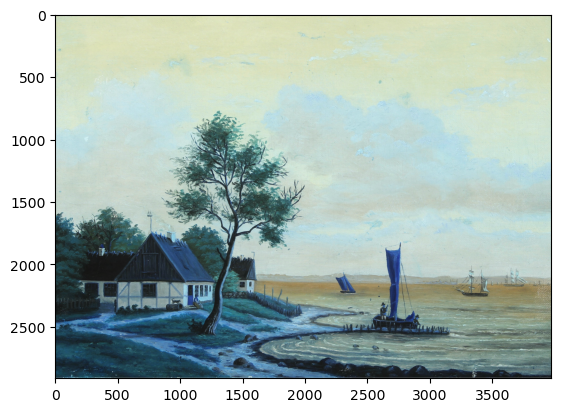

In [3]:
#performimg a read of the image 
img = cv2.imread('_Coastal_scenery_with_a_farm_and_ships_at_the_sea.jpg')

#show the image 
plt.imshow(img)

In [5]:
#This is a 3d array of pixel color info in BGR format 
print(img)
print("Image properties")
print("-Pixel number: " + str(img.size))
print("-Shape: " + str(img.shape))

[[[213 219 184]
  [209 215 180]
  [209 215 180]
  ...
  [207 221 187]
  [208 222 188]
  [208 221 189]]

 [[211 217 182]
  [209 215 180]
  [210 216 181]
  ...
  [207 221 187]
  [208 222 188]
  [209 222 190]]

 [[213 220 185]
  [213 220 185]
  [215 222 187]
  ...
  [206 219 187]
  [209 222 190]
  [208 223 191]]

 ...

 [[ 30  59  74]
  [ 31  60  75]
  [ 31  60  75]
  ...
  [ 29  31  32]
  [ 30  32  33]
  [ 30  32  33]]

 [[ 85 103 114]
  [ 86 104 115]
  [ 86 104 115]
  ...
  [ 78  80  80]
  [ 79  81  81]
  [ 79  81  81]]

 [[224 236 246]
  [226 238 248]
  [226 238 248]
  ...
  [238 240 240]
  [238 240 240]
  [238 240 240]]]
Image properties
-Pixel number: 34708128
-Shape: (2912, 3973, 3)


#### Lets perfrom some color changes 


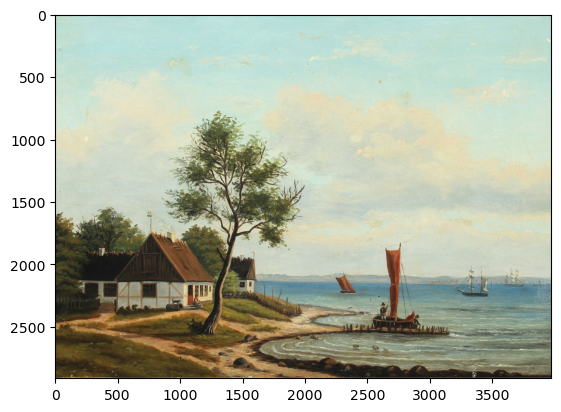

In [6]:
#change blue to red and red to blue 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#Show
plt.imshow(img)

**That looks lovely!!!**

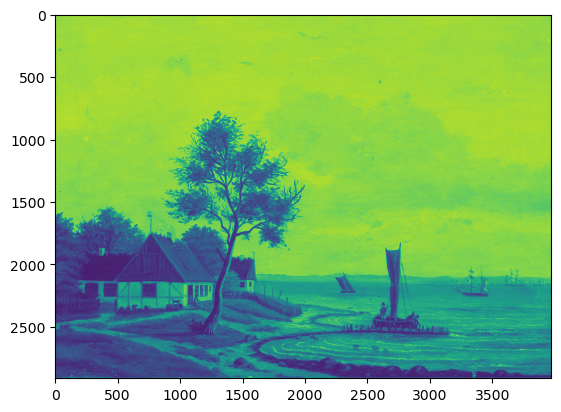

In [9]:
#change to grayScale
g_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(g_img)

it's not turning to black and white because we converting BGR to Gray hence now we should convert from gray to RGB to have it as black and white 


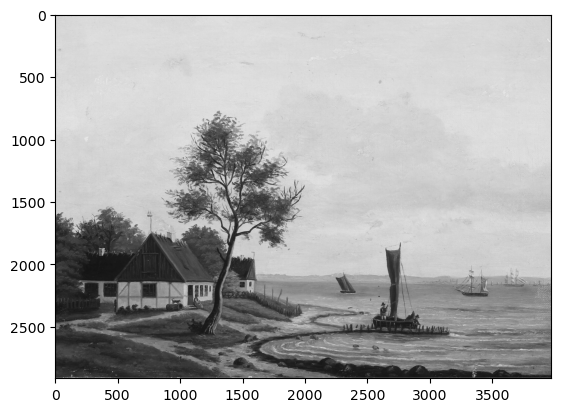

In [10]:
plt.imshow(cv2.cvtColor(g_img, cv2.COLOR_GRAY2RGB))

There now

In [11]:
# lets observe the image representation
print(g_img)

[[213 209 209 ... 213 214 213]
 [211 209 210 ... 213 214 214]
 [214 214 216 ... 211 214 215]
 ...
 [ 52  53  53 ...  31  32  32]
 [ 99 100 100 ...  79  80  80]
 [234 236 236 ... 239 239 239]]


**The grayscale image is a 2D-array** 

In [16]:
#Lets find the mean/average color of the image 

# finding the average per row of img 
# np.average() takes in an axis argument which finds the average across that axis.(axis=0) 

avg_color_per_row = np.average(img, axis = 0)

#finding the average accross average per row 
avg_color = np.average(avg_color_per_row, axis=0)

print(avg_color)# this returns float values 

#lets convert the avg_color to uint8 which suits images and represents them RGB format 

avg_color = np.uint8(avg_color)
print(avg_color)

[168.28297032 175.76737233 155.08647571]
[168 175 155]


#### Image 2

Lets observe another image and perform some basic operations eg gradient operation

In [17]:
#dowloading an image 
import urllib.request

url = ' https://upload.wikimedia.org/wikipedia/commons/1/14/Brad_Pitt_%2815570818296%29.jpg'
urllib.request.urlretrieve(url, 'Brad_Pitt_%2815570818296%29.jpg')


('Brad_Pitt_%2815570818296%29.jpg', <http.client.HTTPMessage at 0x13ffdbc10>)

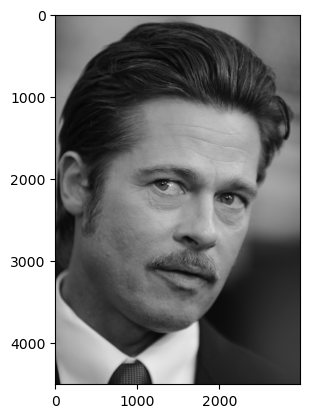

In [21]:
#lets perform a read
img_gray = cv2.imread('Brad_Pitt.jpg',0)

plt.imshow(cv2.cvtColor(img_gray,cv2.COLOR_GRAY2RGB))

In [24]:
# height and width
h,w = img_gray.shape

h,w

(4504, 2988)

In [25]:
#image dimension
np.asarray(img_gray) 

array([[ 97,  97,  97, ..., 100, 104, 106],
       [ 98, 100, 102, ..., 101, 104, 106],
       [ 97,  99, 100, ..., 104, 104, 103],
       ...,
       [ 13,  13,  14, ...,  52,  52,  52],
       [ 13,  13,  13, ...,  53,  53,  52],
       [ 14,  15,  14, ...,  53,  53,  51]], dtype=uint8)

pitts image is a 2D array 

In [36]:
# lets apply a gradient operation 
img_gray = img_gray.astype(np.int16)
for i in range(0,h):#iterates over the rows (height) of the image.
    for j in range(0, w-1):# iterates over the columns (width) of the image, but stops one column short to ensure that the next pixel to the right can be accessed.
        min_pix_val= min(img_gray[i][j+1], img_gray[i][j])
        if min_pix_val == img_gray[i][j+1] :
            temp_arr = img_gray[i][j] - img_gray[i][j+1]
        else:
            temp_arr = img_gray[i][j] - img_gray[i][j+1]
        img_gray[i,j] = temp_arr

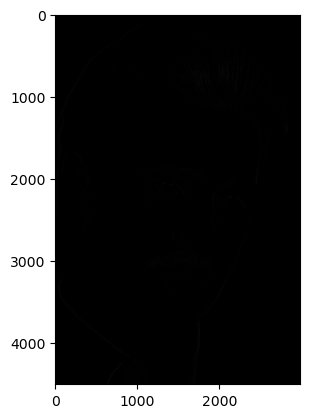

In [38]:
# use pillow package 
from PIL import Image 
#
gradeint_img = Image.fromarray(img_gray)
plt.imshow(gradeint_img,cmap='gray')
plt.show()

Lets get the negative- photographic image that reproduces the bright portions of the photographed subject as dark and the dark parts as light areas-image of Brad pitt.

Negatives are usually formed on a transparent material, such as plastic or glass.

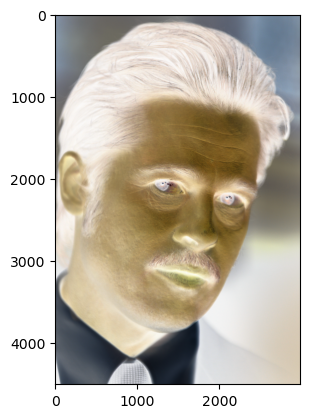

In [39]:
img = cv2.imread('brad_pitt.jpg')
B,G,R = cv2.split(img)
B[:] = [255-x for x in B]#inverting blue 
G[:] = [255-x for x in G]#inverting Green 
R[:] = [255-x for x in R]#inverting Red

#save the image 
neg_img = cv2.merge((B,G,R))
plt.imshow(neg_img)

#### Thresholding 


When creating a binary image, or when giving each pixel a value of either 0 or 1, we use a technique called binary thresholding. We can use thresholding to accomplish this. For instance, if the Threshold (T) value is 90, all pixels with values greater than 90 would be given a value of 1, and all pixels with values less than or equal to that would be given a value of 0.

In [41]:
#dowloading an image 
import urllib.request

url ='https://upload.wikimedia.org/wikipedia/commons/0/0d/Upstate_New_York_Fall_Colors_-_Autumn_at_Church_Pond%2C_Paul_Smiths_%2830273943696%29.jpg'
urllib.request.urlretrieve(url, 'Autumn_at_Church_Pond.jpg')


('Autumn_at_Church_Pond.jpg', <http.client.HTTPMessage at 0x16adf8d90>)

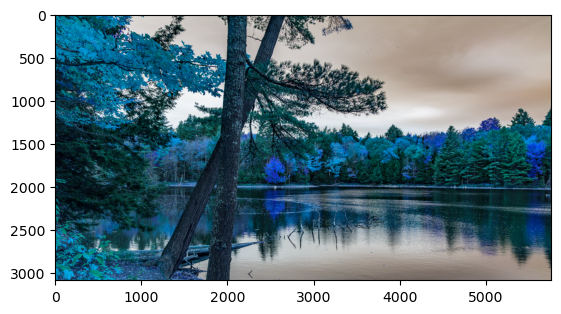

In [44]:
#performimg a read of the image 
img = cv2.imread('Autumn_at_Church_Pond.jpg')

#show the image 
plt.imshow(img)

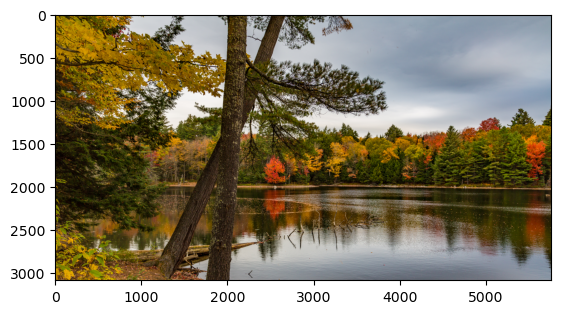

In [47]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#Show
plt.imshow(img)

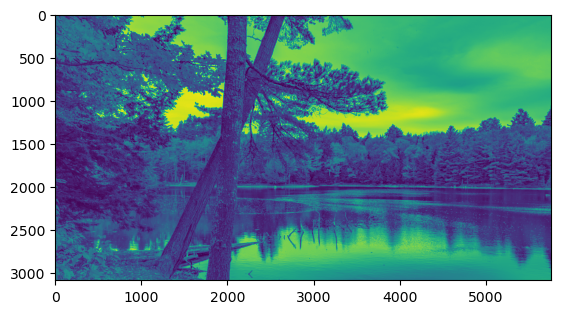

In [49]:
#change to grayScale
g_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(g_img)

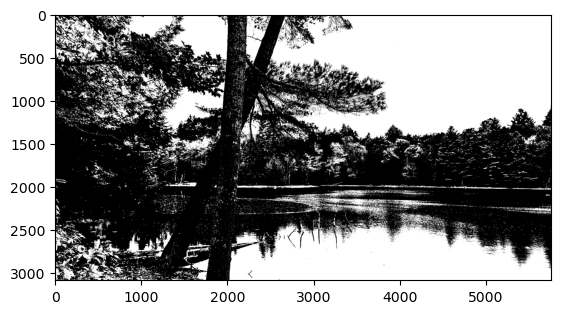

In [56]:


#thresholding the grayscale image 
_, threshold_img = cv2.threshold(g_img, 90, 255, cv2.THRESH_BINARY)

threshold_img = cv2.cvtColor(threshold_img, cv2.COLOR_GRAY2RGB)

#Showing the image 
plt.imshow(threshold_img)

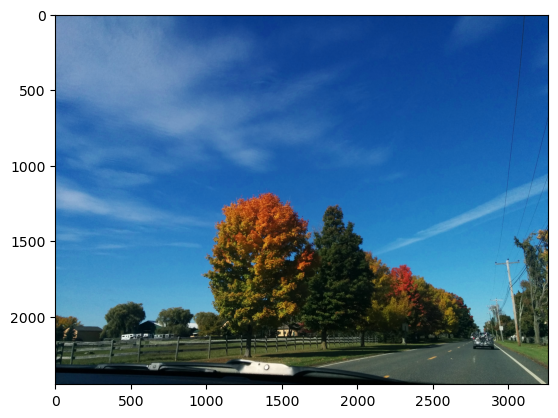

In [70]:
#lets how we can use this in noise removal 

blue_min = np.array([80,60,60, np.uint8])
blue_max = np.array([150,255,255, np.uint8])

# Hue, Saturation, and Value (HSV) is a color model that is often used in place of the RGB color model in graphics and paint programs.  
# In using this color model,a color is specified then white or black is added to easily make color adjustments. 
image = cv2.imread('upstate-ny.jpg')
img_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

plt.imshow(cv2.cvtColor(img_hsv,cv2.COLOR_HSV2RGB))

In [72]:
mask_inverse = cv2.inRange(img_hsv, blue_min, blue_max) 
mask = cv2.bitwise_not(mask_inverse) 
plt.imshow(cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB))

error: OpenCV(4.7.0) :-1: error: (-5:Bad argument) in function 'inRange'
> Overload resolution failed:
>  - lowerb data type = 17 is not supported
>  - Expected Ptr<cv::UMat> for argument 'lowerb'
